In [1]:
import numpy as np
import os
from PIL import Image

from scipy.ndimage import shift
from skimage import io

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image1 = os.path.join("data",  "siemens_star.tif")
assert os.path.exists(image1), f"File does not exist: {image1}"

image2 = os.path.join("data", "rectangle_grid.tif")
assert os.path.exists(image2), f"File does not exist: {image2}"


In [63]:
config = {'chip1': {'xoffset': 1,
                    'yoffset': 1,
                    'description': 'top right chip'},
            'chip2': {'xoffset': 0,
                    'yoffset': 0,
                    'description': 'top left and reference chip'},
            'chip3': {'xoffset': 0,
                        'yoffset': 1,
                        'description': 'bottom left chip'},
            'chip4': {'xoffset': 1,
                    'yoffset': 2,
                    'description': 'bottom right chip'}
}

shift_config = {'chip1': {'xoffset': 2.4,
                    'yoffset': 1,
                    'description': 'top right chip'},
            'chip2': {'xoffset': 0,
                    'yoffset': 0,
                    'description': 'top left and reference chip'},
            'chip3': {'xoffset': 0,
                        'yoffset': 1,
                        'description': 'bottom left chip'},
            'chip4': {'xoffset': 2.3,
                    'yoffset': 2.3,
                    'description': 'bottom right chip'}
}



In [64]:
# Load images
data_images1 = np.array(Image.open(image1))
# data_images2 = np.array(Image.open(image2))

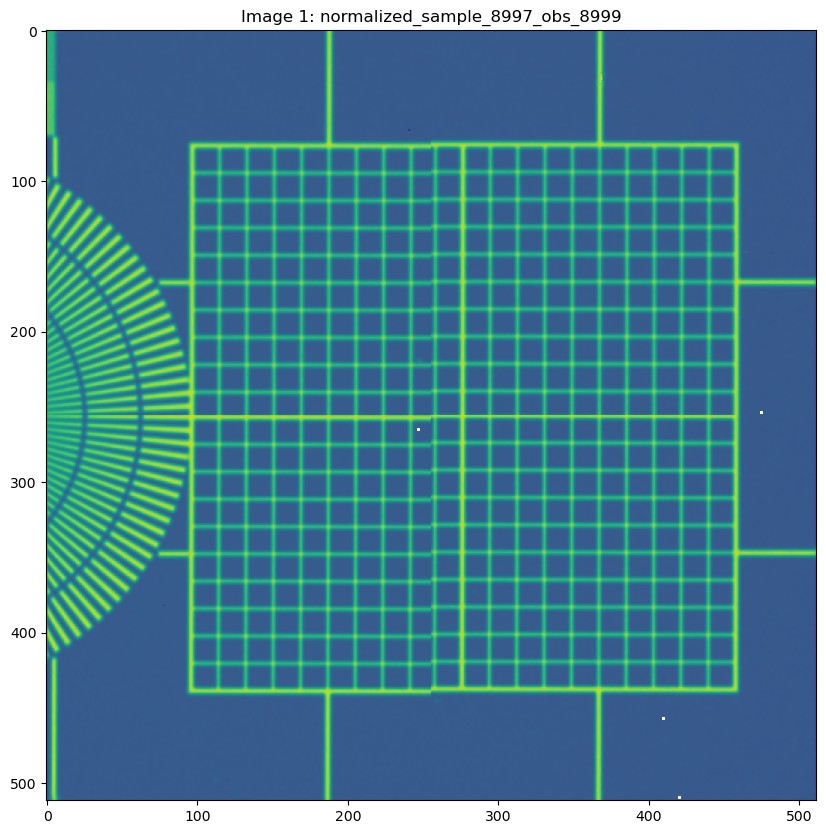

In [65]:
# preview
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(data_images1)
ax.set_title("Image 1: normalized_sample_8997_obs_8999")
# ax.axis('off')
plt.show()

# checking verticality and horizontality of the image

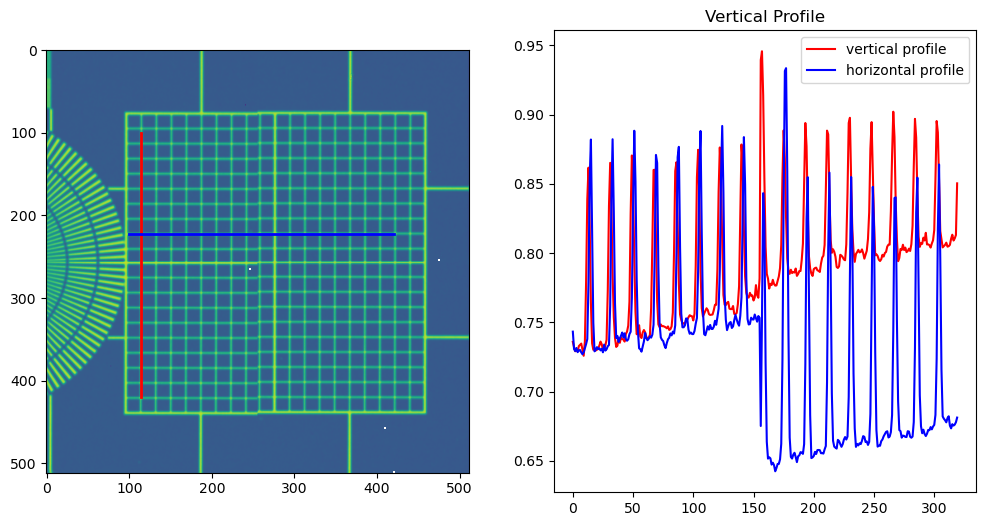

In [66]:
data_images1 = np.array(Image.open(image1))

x = 114
y= 223

vertical_profile = data_images1[100: 420, x]
horizontal_profile = data_images1[y, 100: 420]

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(data_images1)
# display where the profiles come from
axs[0].add_line(plt.Line2D([x, x], [100, 420], color='red', lw=2))
axs[0].add_line(plt.Line2D([100, 420], [y, y], color='blue', lw=2))

axs[1].plot(vertical_profile, label='vertical profile', color='red')
axs[1].plot(horizontal_profile, label='horizontal profile', color='blue')
axs[1].set_title("Vertical Profile")
axs[1].legend()
plt.show()

# Y shift of chips1

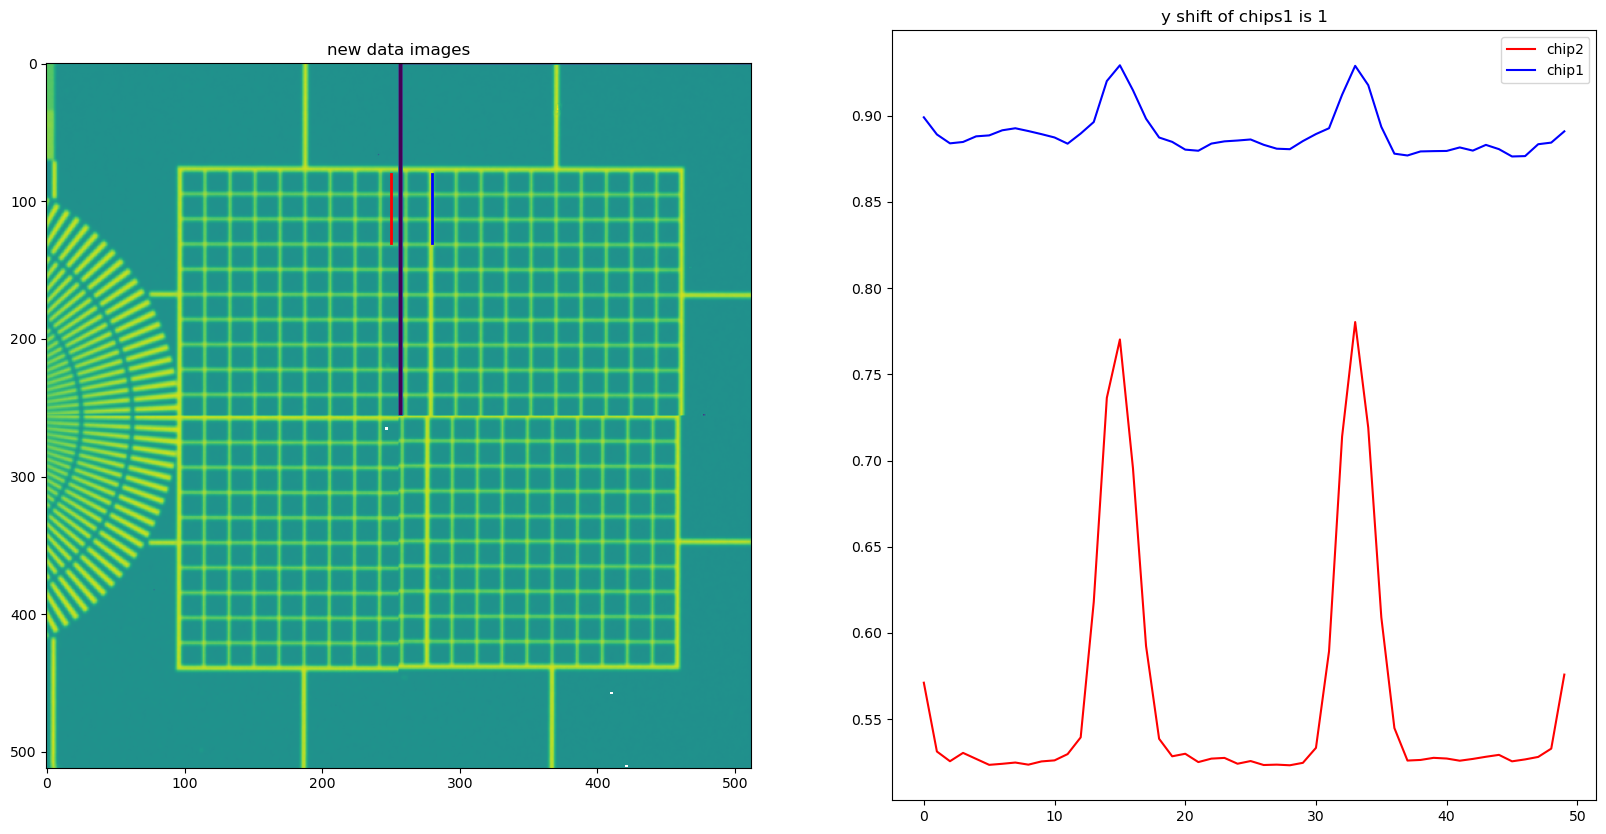

In [67]:
# let's start by finding the offset between chips 1 and 2 (fixed one)
data_images1 = np.array(Image.open(image1))

region = data_images1[0:256, 256:]
region[np.isnan(region)] = 0

chips1_shift = (shift_config['chip1']['yoffset'], shift_config['chip1']['xoffset'])
shifted_data = shift(region, shift=chips1_shift, order=3)
new_data_images = data_images1.copy()
new_data_images[0:256, 256:] = 0
new_data_images[0:256, 256:] = shifted_data

# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')

v_profile_chips2 = new_data_images[80:130, 250]
v_profile_chips1 = new_data_images[80:130, 280]

# display where the profiles come from
axs[0].add_line(plt.Line2D([250, 250], [80, 130], color='red', lw=2))
axs[0].add_line(plt.Line2D([280, 280], [80, 130], color='blue', lw=2))

axs[1].plot(v_profile_chips2, label='chip2', color='red')
axs[1].plot(v_profile_chips1, label='chip1', color='blue')

axs[1].set_title(f"y shift of chips1 is {chips1_shift[0]}")
axs[1].legend()
plt.show()

# X shift of ships 3

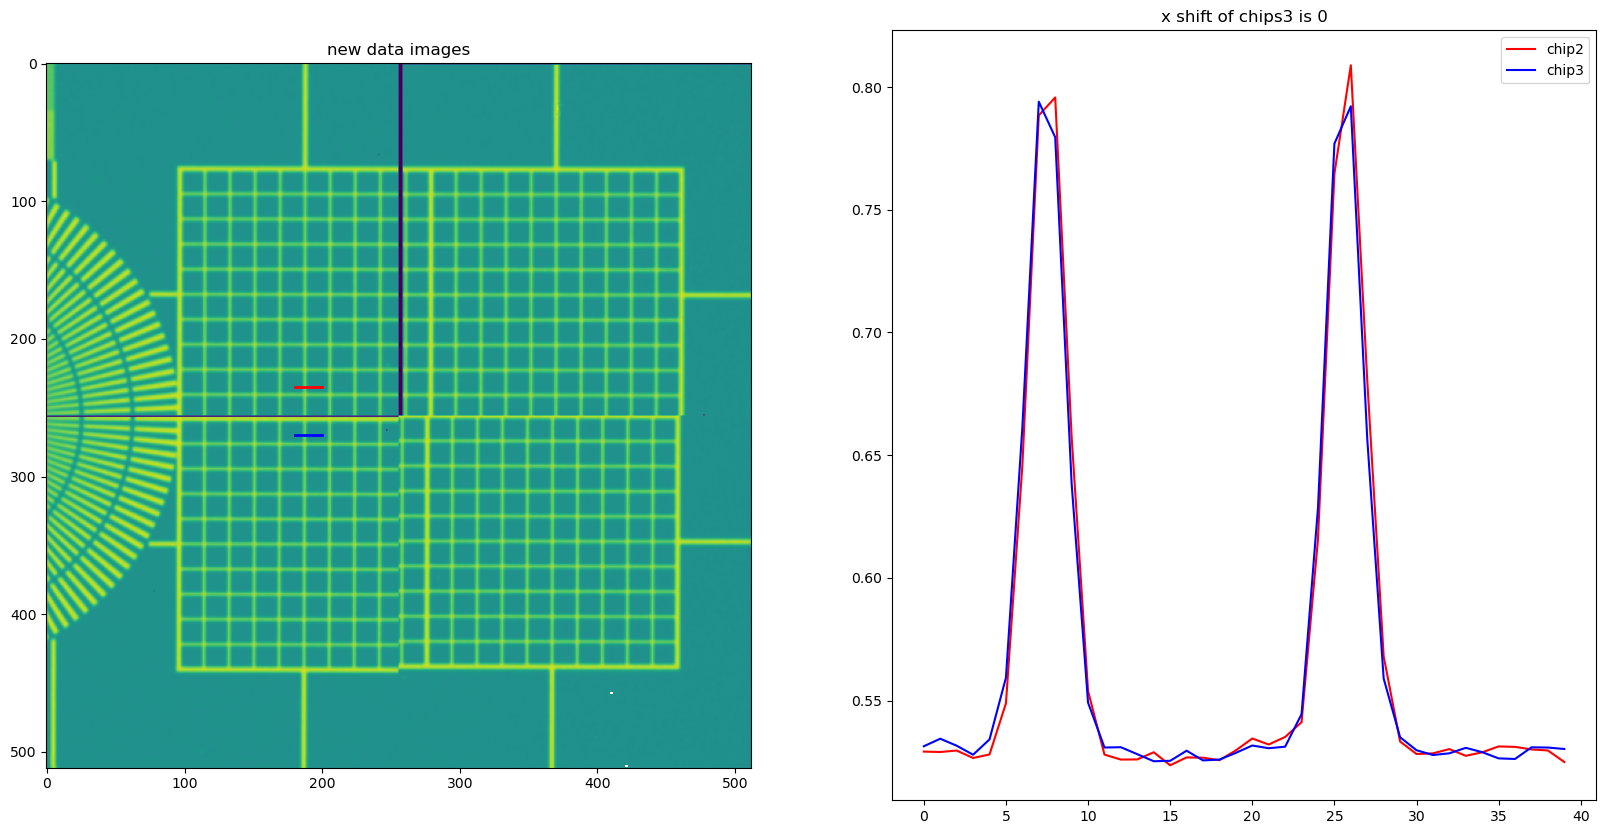

In [68]:
region = new_data_images[256:, 0:256]
region[np.isnan(region)] = 0

chips3_shift = (shift_config['chip3']['yoffset'], shift_config['chip3']['xoffset'])
shifted_data = shift(region, shift=chips3_shift, order=3)
new_data_images = new_data_images.copy()
new_data_images[256:, 0:256] = 0
new_data_images[256:, 0:256] = shifted_data

# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')

h_profile_chips2 = new_data_images[235, 180:220]
h_profile_chips3 = new_data_images[270, 180:220]

# display where the profiles come from
axs[0].add_line(plt.Line2D([180, 200], [235, 235], color='red', lw=2))
axs[0].add_line(plt.Line2D([180, 200], [270, 270], color='blue', lw=2))

axs[1].plot(h_profile_chips2, label='chip2', color='red')
axs[1].plot(h_profile_chips3, label='chip3', color='blue')

axs[1].set_title(f"x shift of chips3 is {chips3_shift[1]}")
axs[1].legend()
plt.show()

# X and Y shift of chips4 

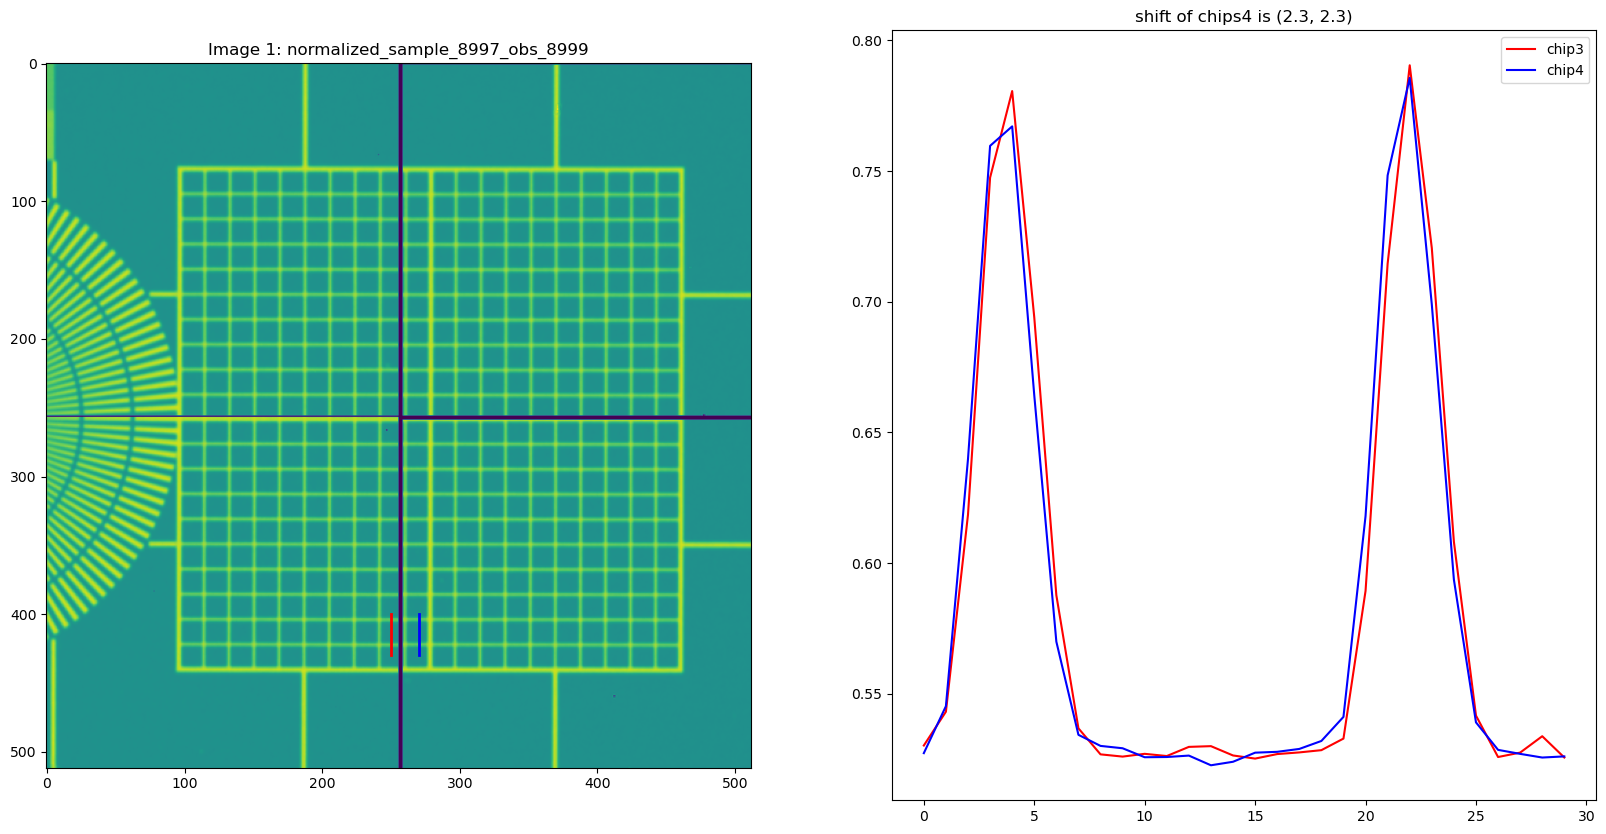

In [69]:
region = new_data_images[256:, 256:]
region[np.isnan(region)] = 0

chips4_shift = (shift_config['chip4']['yoffset'], shift_config['chip4']['xoffset'])
shifted_data = shift(region, shift=chips4_shift, order=3)
new_data_images = new_data_images.copy()
new_data_images[256:, 256:] = 0
new_data_images[256:, 256:] = shifted_data

# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("Image 1: normalized_sample_8997_obs_8999")
# axs[0].axis('off')
# display where the profiles come from
axs[0].add_line(plt.Line2D([250, 250], [400, 430], color='red', lw=2))
axs[0].add_line(plt.Line2D([270, 270], [400, 430], color='blue', lw=2))

v_profile_chips3 = new_data_images[400:430, 250]
v_profile_chips4 = new_data_images[400:430, 270]
axs[1].plot(v_profile_chips3, label='chip3', color='red')
axs[1].plot(v_profile_chips4, label='chip4', color='blue')

axs[1].set_title(f"shift of chips4 is {chips4_shift}")
axs[1].legend()
plt.show()

# checking x alignment of 1 and 4

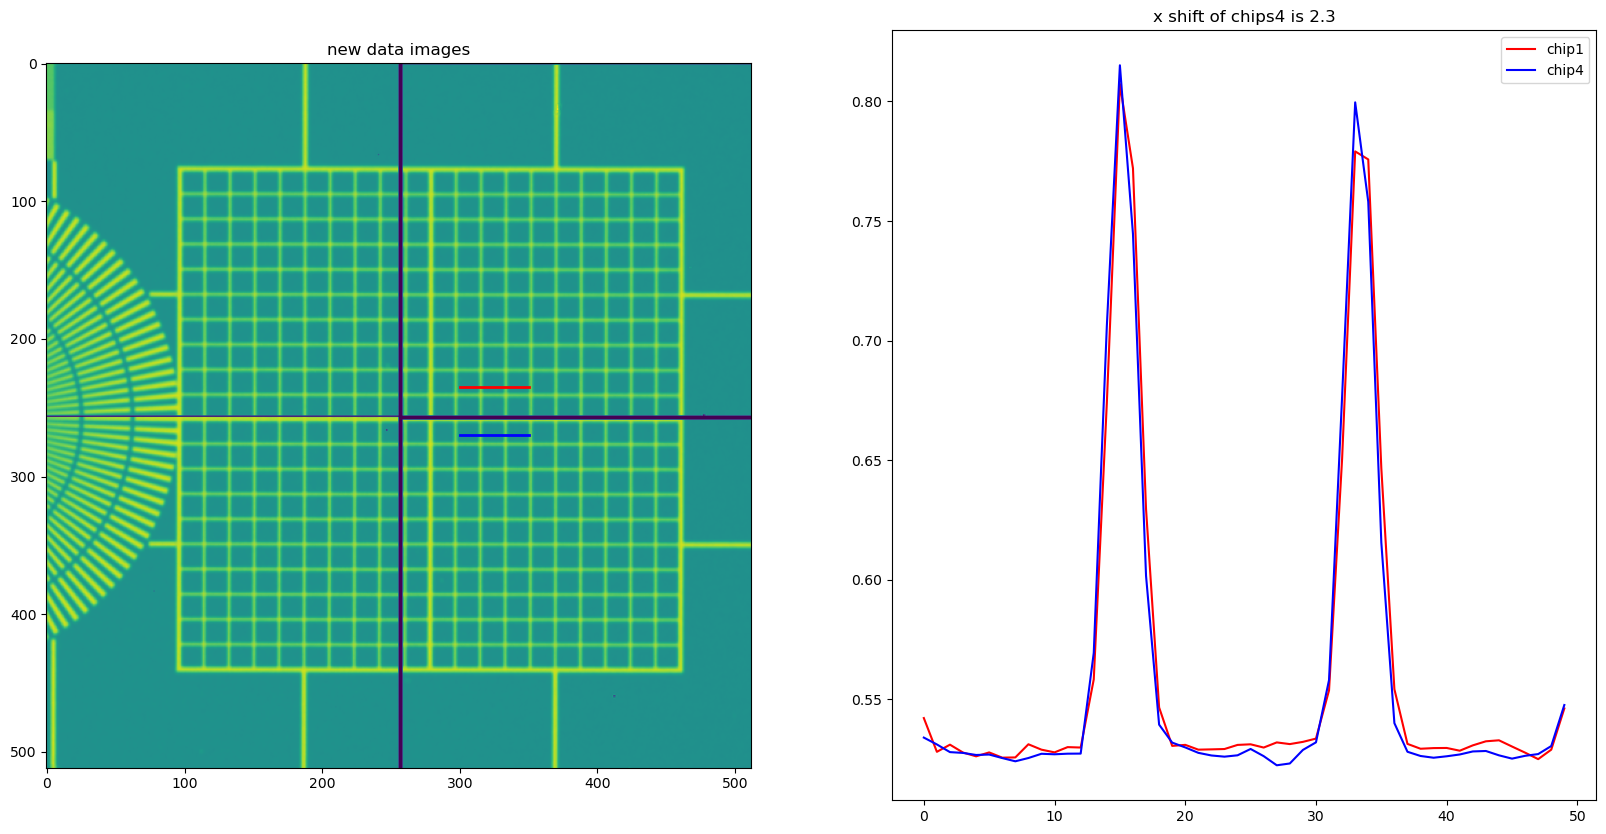

In [70]:
# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')

h_profile_chips2 = new_data_images[235, 300: 350]
h_profile_chips3 = new_data_images[270, 300: 350]

# display where the profiles come from
axs[0].add_line(plt.Line2D([300, 350], [235, 235], color='red', lw=2))
axs[0].add_line(plt.Line2D([300, 350], [270, 270], color='blue', lw=2))

axs[1].plot(h_profile_chips2, label='chip1', color='red')
axs[1].plot(h_profile_chips3, label='chip4', color='blue')

axs[1].set_title(f"x shift of chips4 is {chips4_shift[1]}")
axs[1].legend()
plt.show()

# looking at the x offset of chips 1 and 4 compare to 2 and 3

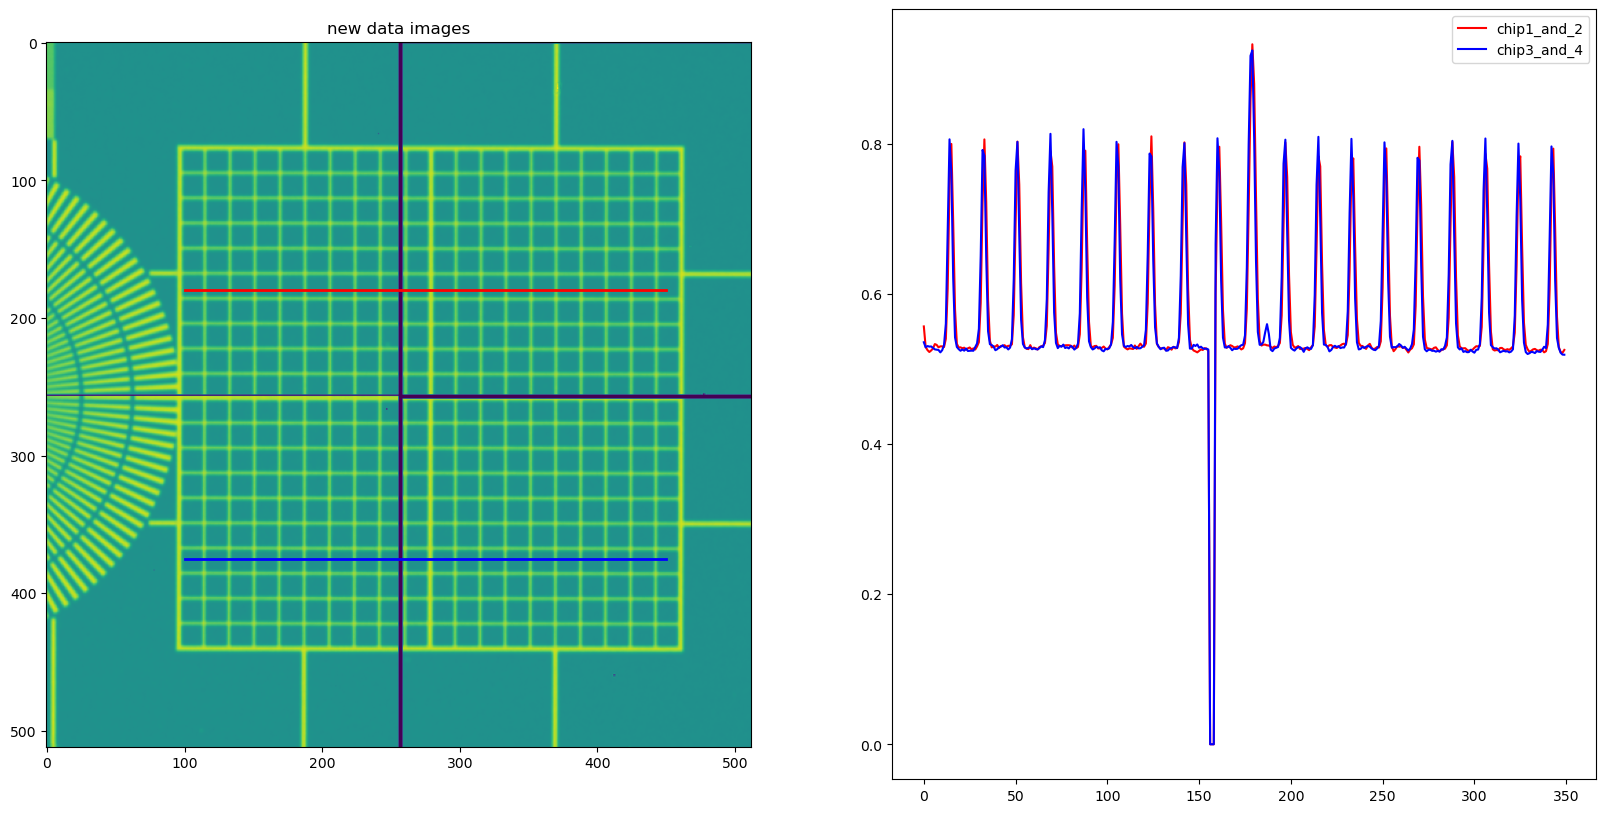

In [71]:
# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')

h_profile_chips2_and_1 = new_data_images[180, 100:450]
h_profile_chips3_and_4 = new_data_images[375, 100:450]

# display where the profiles come from
axs[0].add_line(plt.Line2D([100, 450], [180, 180], color='red', lw=2))
axs[0].add_line(plt.Line2D([100, 450], [375, 375], color='blue', lw=2))

axs[1].plot(h_profile_chips2_and_1, label='chip1_and_2', color='red')
axs[1].plot(h_profile_chips3_and_4, label='chip3_and_4', color='blue')

axs[1].legend()
plt.show()

In [72]:
# find all the local maximum of h_profile_chips2_and_1 with a threshold of 0.7
local_maxima = []
for i in range(1, len(h_profile_chips2_and_1) - 1):
    if h_profile_chips2_and_1[i] > h_profile_chips2_and_1[i - 1] and h_profile_chips2_and_1[i] > h_profile_chips2_and_1[i + 1] and h_profile_chips2_and_1[i] > 0.7:
        local_maxima.append(i)

local_maxima2 = []
for i in range(1, len(h_profile_chips3_and_4) - 1):
    if h_profile_chips3_and_4[i] > h_profile_chips3_and_4[i - 1] and h_profile_chips3_and_4[i] > h_profile_chips3_and_4[i + 1] and h_profile_chips3_and_4[i] > 0.7:
        local_maxima2.append(i)

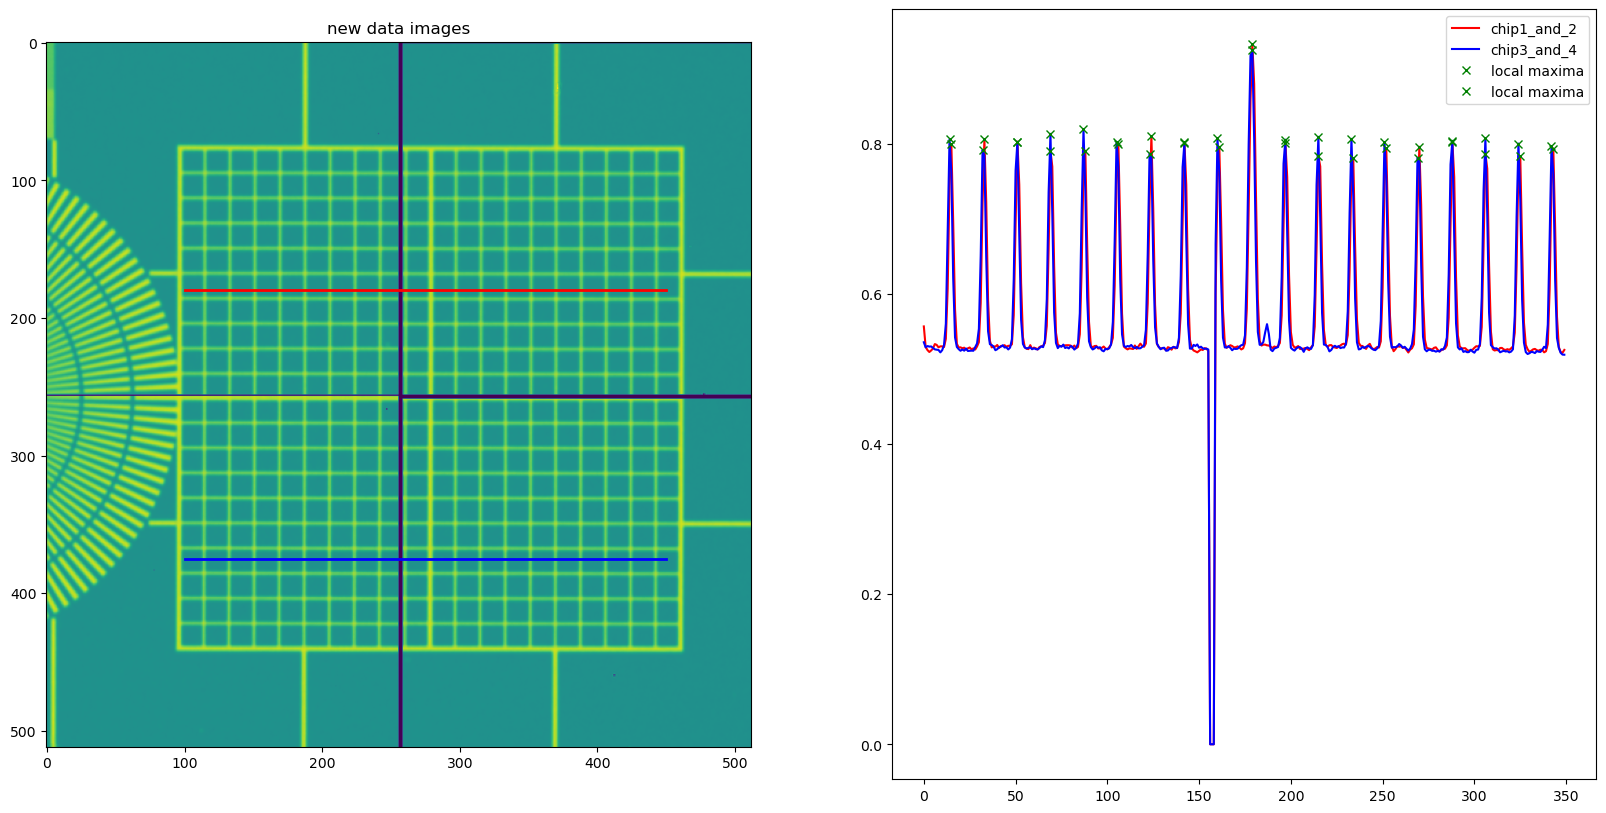

In [73]:
# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')


# display where the profiles come from
axs[0].add_line(plt.Line2D([100, 450], [180, 180], color='red', lw=2))
axs[0].add_line(plt.Line2D([100, 450], [375, 375], color='blue', lw=2))

axs[1].plot(h_profile_chips2_and_1, label='chip1_and_2', color='red')
axs[1].plot(h_profile_chips3_and_4, label='chip3_and_4', color='blue')

axs[1].plot(local_maxima, h_profile_chips2_and_1[local_maxima], "x", label='local maxima', color='green')
axs[1].plot(local_maxima2, h_profile_chips3_and_4[local_maxima2], "x", label='local maxima', color='green')


axs[1].legend()
plt.show()

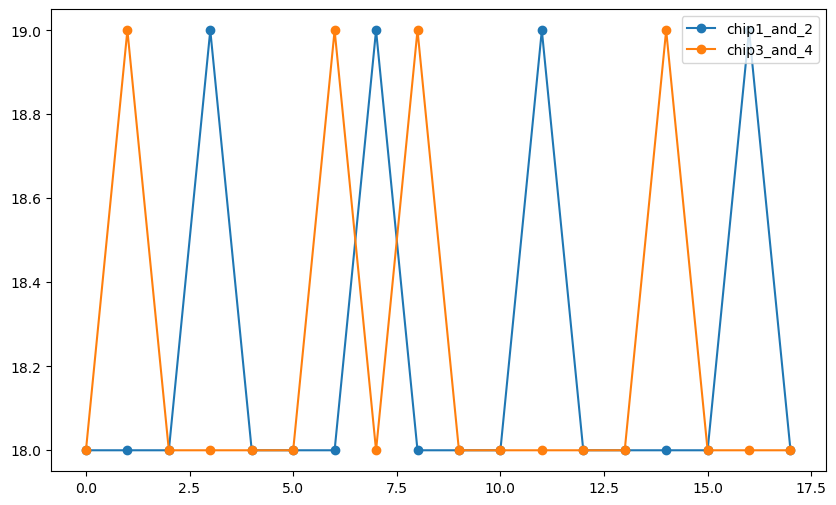

In [74]:
# find the interval between all the maxima
intervals = []
for i in range(1, len(local_maxima)):
    intervals.append(local_maxima[i] - local_maxima[i - 1])

intervals2 = []
for i in range(1, len(local_maxima2)):
    intervals2.append(local_maxima2[i] - local_maxima2[i - 1])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(intervals, marker='o')
ax.plot(intervals2, marker='o')

plt.legend(['chip1_and_2', 'chip3_and_4'])

# Looking at the y offset between chips 1 and 4, and then between 2 and 3

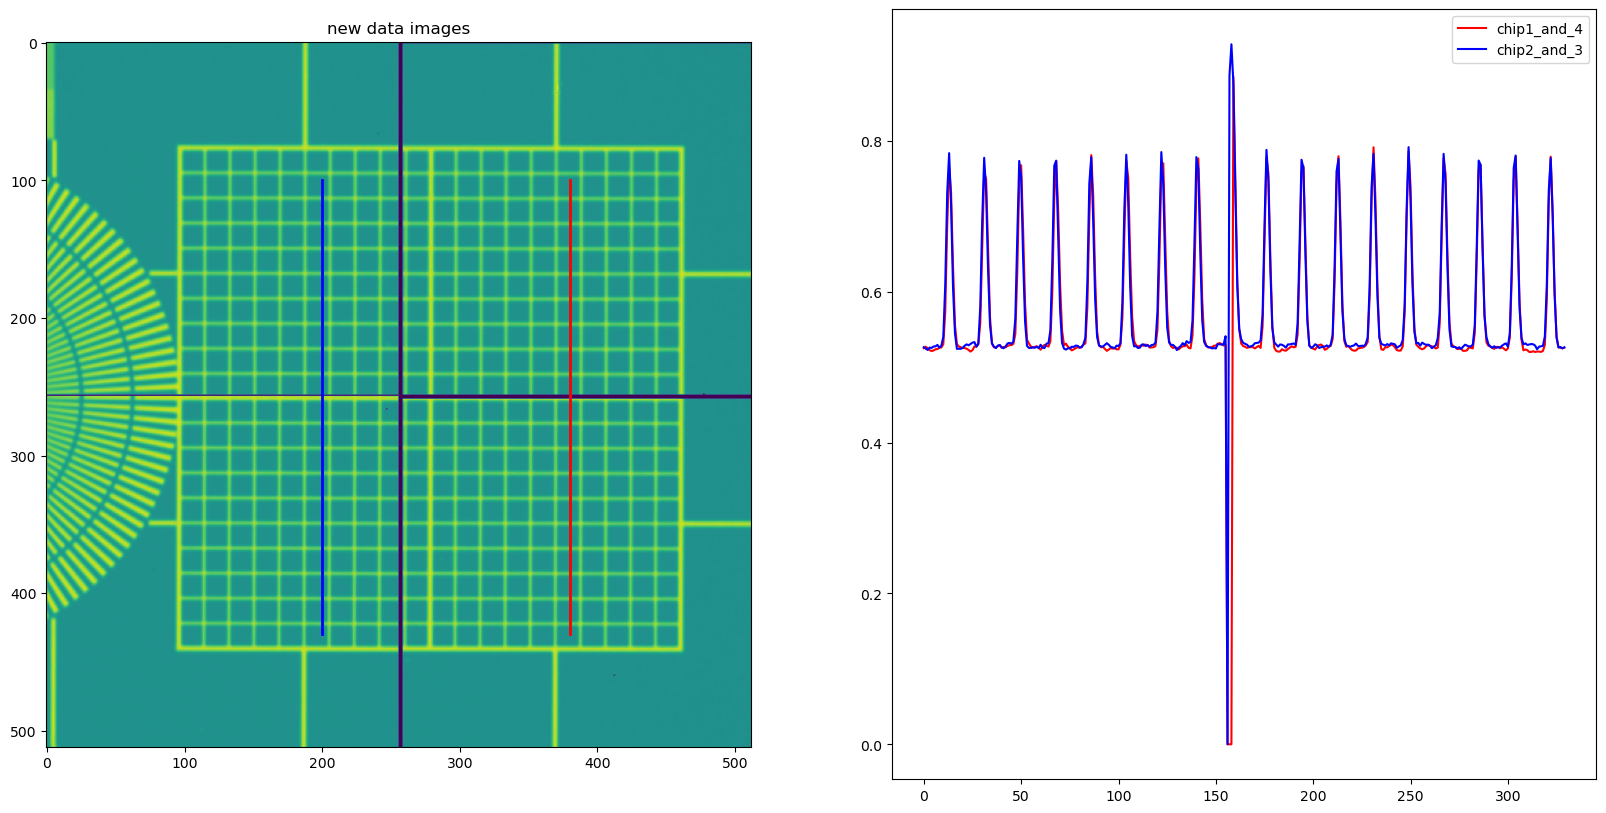

In [75]:
# preview
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
axs[0].imshow(new_data_images)
axs[0].set_title("new data images")
# axs[0].axis('off')

v_profile_chips1_and_4 = new_data_images[100:430, 380]
v_profile_chips2_and_3 = new_data_images[100:430, 200]

# display where the profiles come from
axs[0].add_line(plt.Line2D([380, 380], [100, 430], color='red', lw=2))
axs[0].add_line(plt.Line2D([200, 200], [100, 430], color='blue', lw=2))

axs[1].plot(v_profile_chips1_and_4, label='chip1_and_4', color='red')
axs[1].plot(v_profile_chips2_and_3, label='chip2_and_3', color='blue')

axs[1].legend()
plt.show()

In [76]:
# find all the local maximum of h_profile_chips2_and_1 with a threshold of 0.7
local_maxima = []
for i in range(1, len(v_profile_chips1_and_4) - 1):
    if v_profile_chips1_and_4[i] > v_profile_chips1_and_4[i - 1] and v_profile_chips1_and_4[i] > v_profile_chips1_and_4[i + 1] and v_profile_chips1_and_4[i] > 0.7:
        local_maxima.append(i)

local_maxima2 = []
for i in range(1, len(v_profile_chips2_and_3) - 1):
    if v_profile_chips2_and_3[i] > v_profile_chips2_and_3[i - 1] and v_profile_chips2_and_3[i] > v_profile_chips2_and_3[i + 1] and v_profile_chips2_and_3[i] > 0.7:
        local_maxima2.append(i)

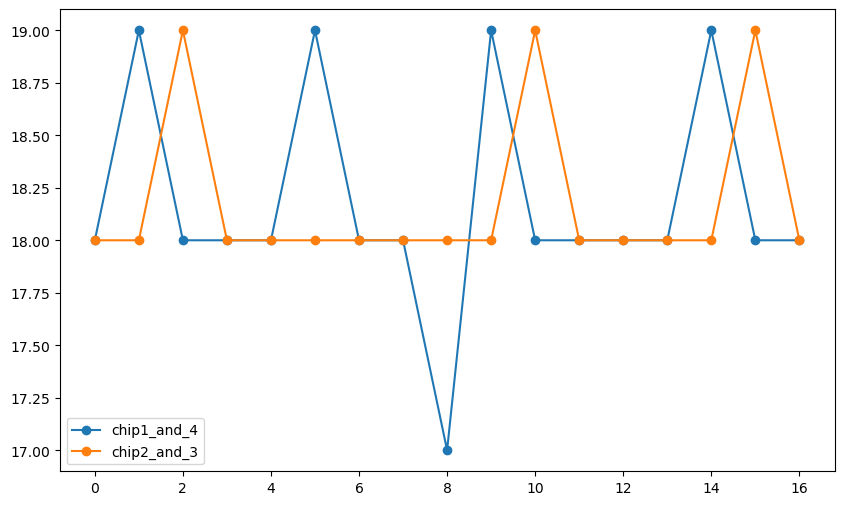

In [77]:
# find the interval between all the maxima
intervals = []
for i in range(1, len(local_maxima)):
    intervals.append(local_maxima[i] - local_maxima[i - 1])

intervals2 = []
for i in range(1, len(local_maxima2)):
    intervals2.append(local_maxima2[i] - local_maxima2[i - 1])

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(intervals, marker='o')
ax.plot(intervals2, marker='o')

plt.legend(['chip1_and_4', 'chip2_and_3'])